# Model validation currents

Note: this notebook requires the model output data

<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Import packages

In [1]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h
import plotting as pl
import pandas as pd
from pathlib import Path

### Define paths

In [ ]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"    
#mr_fldr = "../output_sample/"     # use this if you have not downloaded the full data from Zenodo yet
mr_fn = f"{mr_fldr}Area.dfsu"

In [3]:
# Load observation data
swhlist = h.get_swh_point_obs(station_file="subset_stations.csv")
tplist = h.get_tp_point_obs(station_file="subset_stations.csv")
mdirlist = h.get_mdir_point_obs(station_file="stations.csv")


In [4]:
# Load MIKE21 simulation data
mr_swh = ms.DfsuModelResult(mr_fn, name="MIKE21", item=0)
mr_tp = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_dir = ms.DfsuModelResult(mr_fn, name="MIKE21", item=3)
mr_dir

<DfsuModelResult>: MIKE21
Time: 2022-01-03 00:00:00 - 2022-01-03 23:50:00
Quantity: Mean Wave Direction [degree]

### Create modelskill comparer collection

In [5]:
# swh 
cmps = []
for o in swhlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_swh))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")

cc_swh = ms.ComparerCollection(cmps)

In [6]:
# tp
cmps = []
for o in tplist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_tp))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")
        
cc_tp = ms.ComparerCollection(cmps)

In [7]:
# mdir
cmps = []
for o in mdirlist:
    try:
        cmps.append(ms.match(obs=o, mod=mr_dir))
    except Exception as e:
        print(f"Skipping {o.name} due to error: {e}")
        
cc_dir = ms.ComparerCollection(cmps)

## Skill tables

In [8]:
# Print statistics for the swh-component
cc_swh.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Europlatform2,144,0.282,0.371,0.240,0.302,0.950,0.125,-0.125
IJmuidenMunitiestort_,144,0.409,0.453,0.196,0.409,0.943,0.088,-0.455
J61,144,0.557,0.606,0.238,0.557,0.816,0.094,-2.889
K13a_,144,0.515,0.566,0.235,0.515,0.782,0.102,-3.113
WesthinderBuoy,48,0.209,0.254,0.144,0.213,0.954,0.085,0.595


In [9]:
# Print statistics for the tp-component
cc_tp.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Europlatform2,144,0.328,0.667,0.581,0.522,0.394,0.091,-0.453
IJmuidenMunitiestort_,144,0.439,0.697,0.542,0.584,0.366,0.079,-0.824
J61,144,0.640,0.723,0.335,0.650,0.635,0.049,-2.472
K13a_,144,0.568,0.779,0.533,0.663,0.316,0.080,-1.173


In [10]:
# Print statistics for the mdir-component
cc_dir.skill().round(3)

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
IJmuidenMunitiestort_,144,14.168,14.627,3.637,14.168,0.762,0.015,-5.816
WaddenEierlandseGat,144,15.950,16.446,4.010,15.950,0.827,0.017,-4.488


## Scatter plots

### Significant wave height

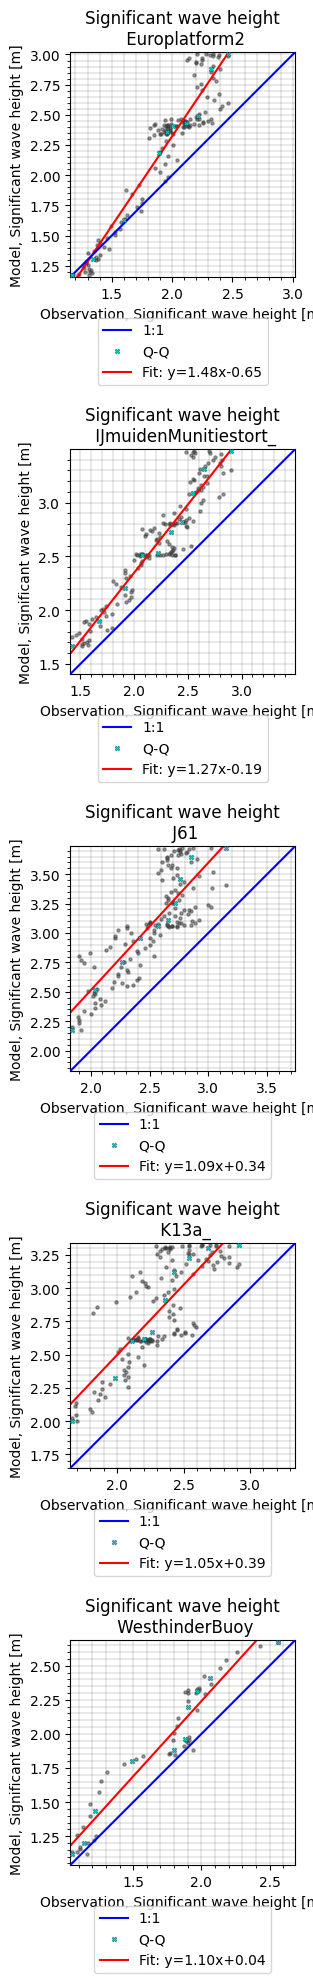

In [11]:
# Plot 
pl.plot_scatter_cc(cc = cc_swh, title='Significant wave height')


<div class="alert alert-warning" role="alert">
  <strong>⚠️ Important Disclaimer</strong><br><br>
  This model setup is a <strong>simplified version</strong> of a detailed model developed by DHI. It does <strong>not</strong> resolve fine-scale processes and is <strong>not calibrated</strong> for operational use. Use is limited to <strong>educational and research purposes only</strong> — results should <strong>not</strong> inform decision-making. Performance shown here does <strong>not</strong> represent that of DHI’s high-resolution models.
</div>

### Peak wave period

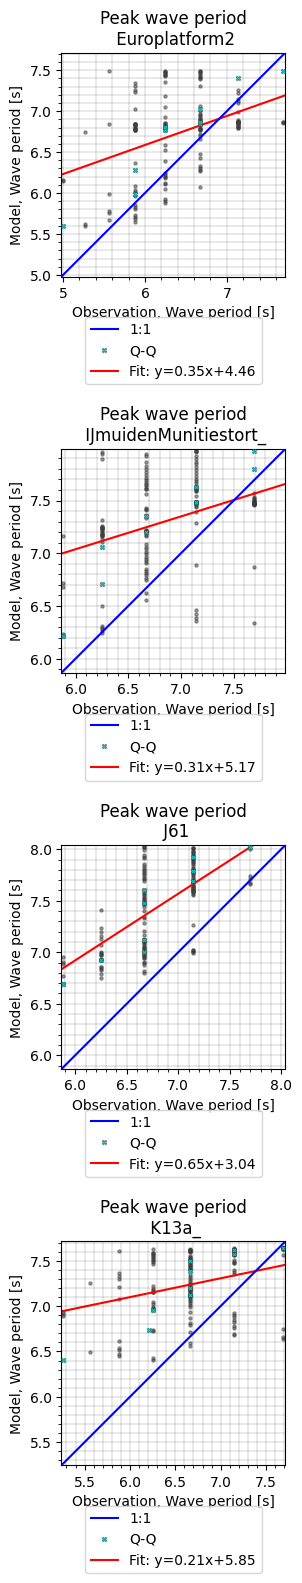

In [12]:
# Scatter plot
pl.plot_scatter_cc(cc = cc_tp, title='Peak wave period')

### Mean wave direction

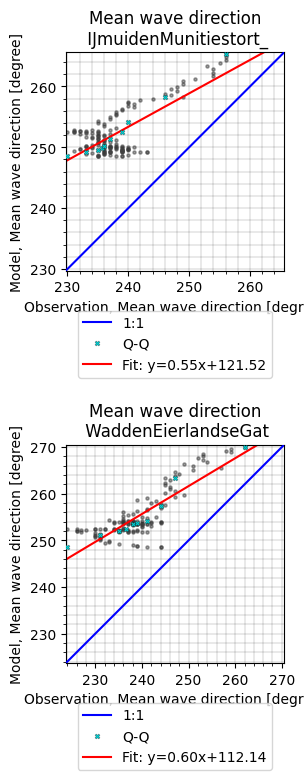

In [13]:
# Scatter plot
pl.plot_scatter_cc(cc = cc_dir, title='Mean wave direction')

## Timeseries

### Significant wave height

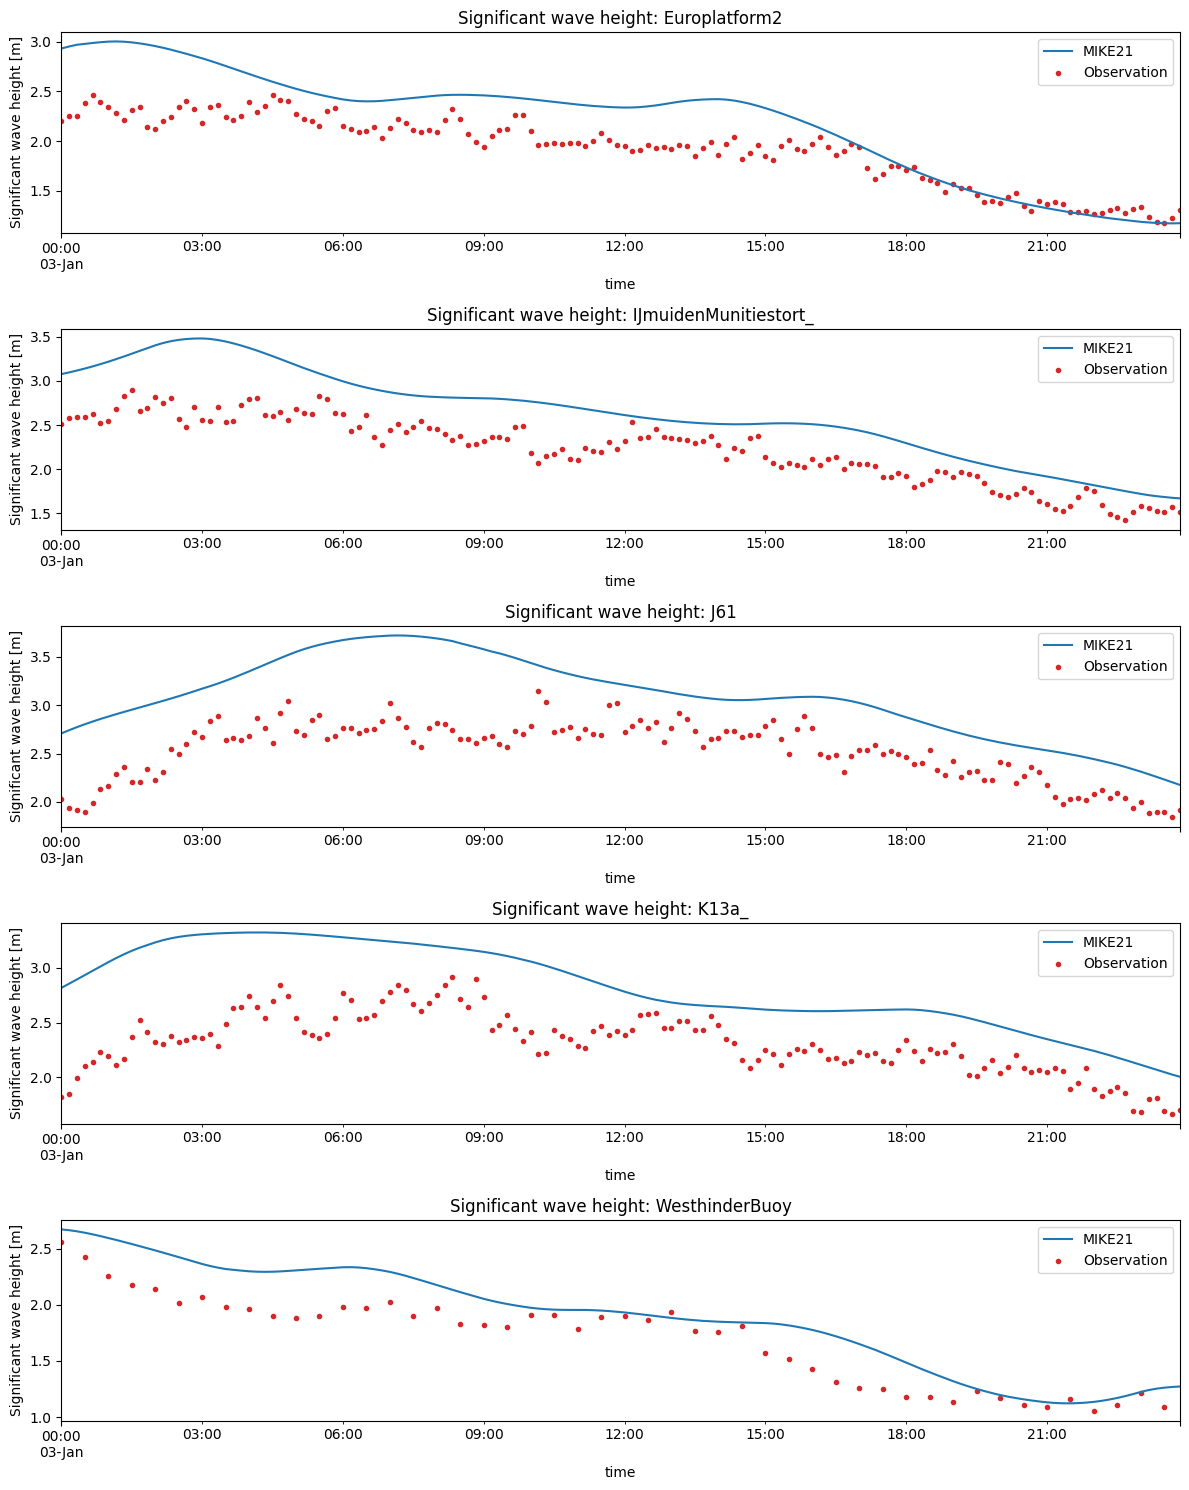

In [14]:
pl.plot_timeseries_currents(cc = cc_swh, title='Significant wave height')

### Peak wave period

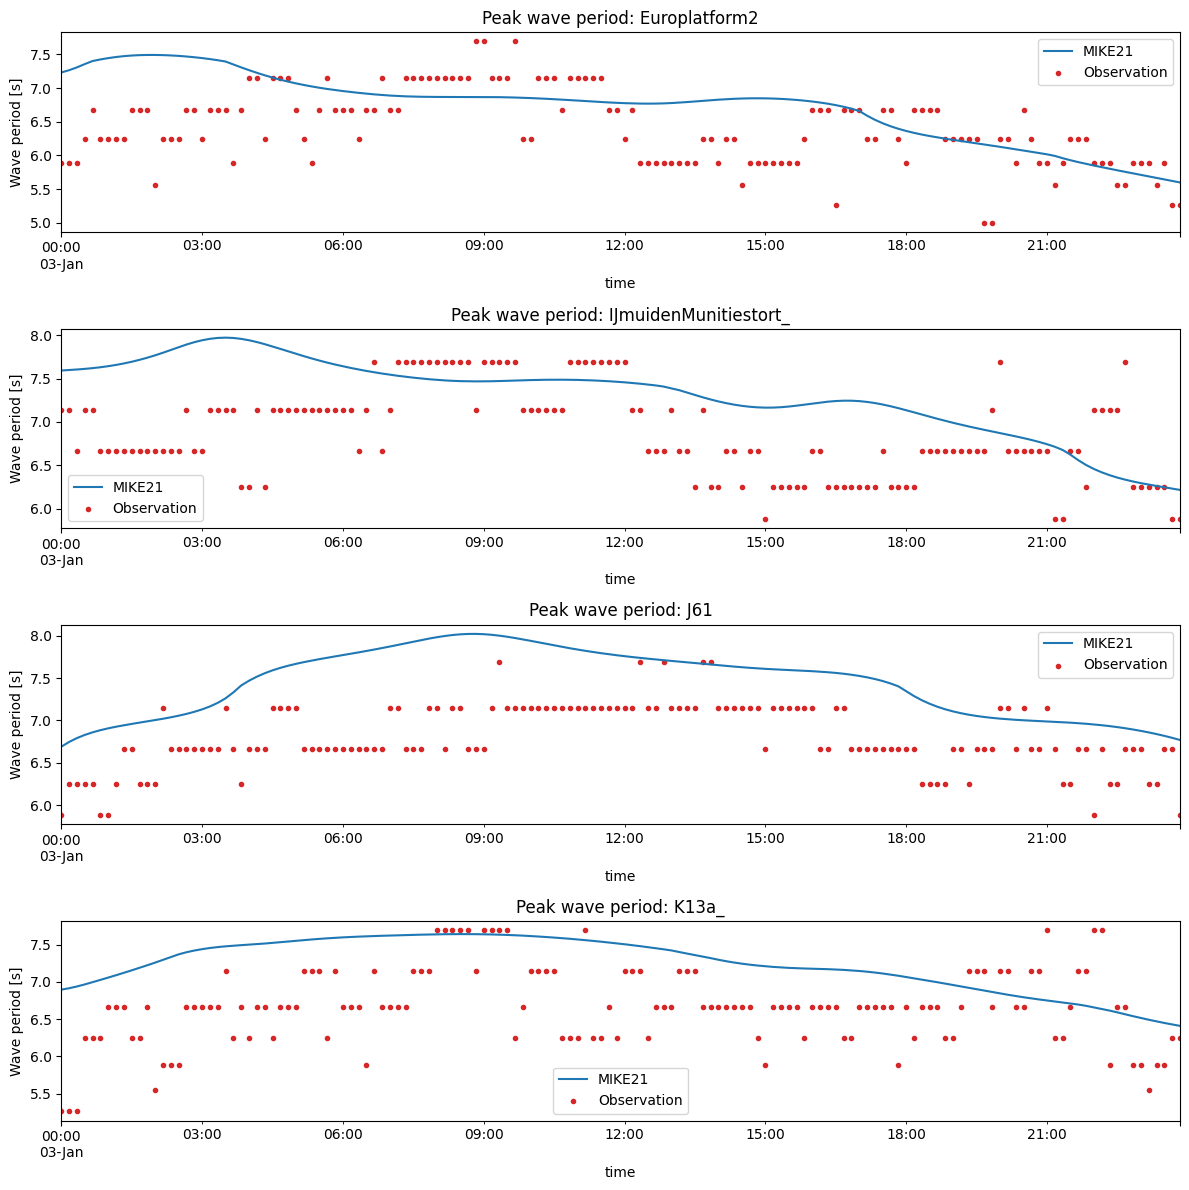

In [15]:
pl.plot_timeseries_currents(cc = cc_tp, title='Peak wave period')

### Mean wave direction

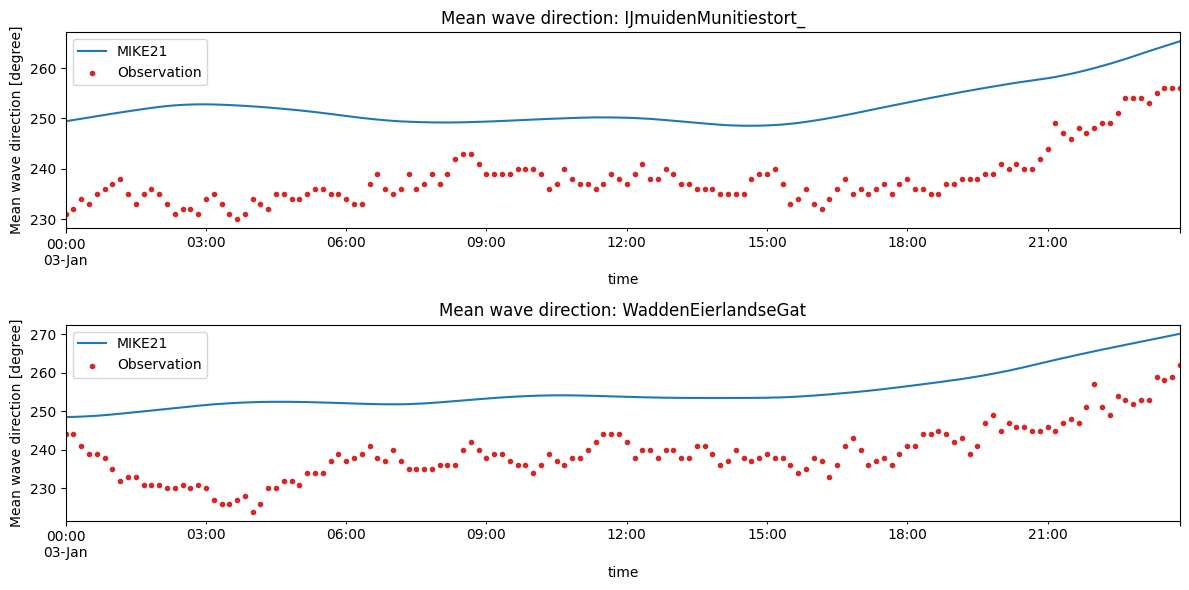

In [16]:
pl.plot_timeseries_currents(cc = cc_dir, title='Mean wave direction')